<a href="https://colab.research.google.com/github/liminovna/HSE_ML_NOTEBOOKS/blob/main/ML_HW4_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Часть 1

Будем использовать датасет по мобильным телефонам и предсказывать ценовой сегмент телефона.

Описание признаков:
* ID - уникальный ключ
* battery_power - Total energy a battery can store in one time measured in mAh
* blue - Has bluetooth or not
* clock_speed - speed at which microprocessor executes instructions
* dual_sim - Has dual sim support or not
* fc - Front Camera mega pixels
* four_g - Has 4G or not
* int_memory - Internal Memory in Gigabytes
* m_dep - Mobile Depth in cm
* mobile_wt - Weight of mobile phone
* n_cores - Number of cores of processor
* pc - Primary Camera mega pixels
* px_height - Pixel Resolution Height
* px_width - Pixel Resolution Width
* ram - Random Access Memory in Megabytes
* sc_h - Screen Height of mobile in cm
* sc_w -  Screen Width of mobile in cm
* talk_time - longest time that a single battery charge will last when you are
* three_g - Has 3G or not
* touch_screen - Has touch screen or not
* wifi - Has wifi or not
* price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


## 1.1. Загрузка данных

In [2]:
# Загружаем данные из ссылки

sharing_url = "https://drive.google.com/file/d/1XkKOS6jbke3JYWTj8V_xS46txe820rZ_/view?usp=sharing"
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## 1.2. EDA

In [3]:
# описываем распределения данных
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
# достаем уникальные значения, чтобы прикинуть, какие данные -- категориальные или количественные -- содержатся в столбцах
for c in df.columns:
  print(c, df[c].unique())

battery_power [ 842 1021  563 ... 1139 1467  858]
blue [0 1]
clock_speed [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim [0 1]
fc [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g [0 1]
int_memory [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 19

можем выделить несколько категориальных признаков со значениями 0 и 1, price_range с 4 возможными значениями и все остальные -- количественные признаки

In [5]:
# раскладываем по разным спискам категориальные (бинарные) и численные признаки: мы будем анализировать их по-разному
binary = [] # бинарные признаки
quant = [] # количественные признаки
for c in df.drop(columns=['price_range']).columns:
  if sorted(list(df[c].unique())) == [0,1]:
    binary.append(c)
  else:
    quant.append(c)

print('бинарные признаки:\t', binary)
print('количественные признаки:', quant)

бинарные признаки:	 ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
количественные признаки: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [6]:
#  смотрим распределение ценовых категорий

df.groupby(['price_range'])['price_range'].count()

,price_range
price_range,
0,500
1,500
2,500
3,500


В датасете для каждой ценовой категории есть по 500 моделей телефонов.

In [7]:
# смотрим, какие средние значения для каждой ценовой категории в столбцах с количественными признаками
df.groupby(['price_range']).mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


лучше изобразить эти распределения на графике

In [8]:
# Импортируем библиотеки для визуализации и настраиваем тему
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid") # white, dark, whitegrid, darkgrid, ticks
sns.set_color_codes("muted")

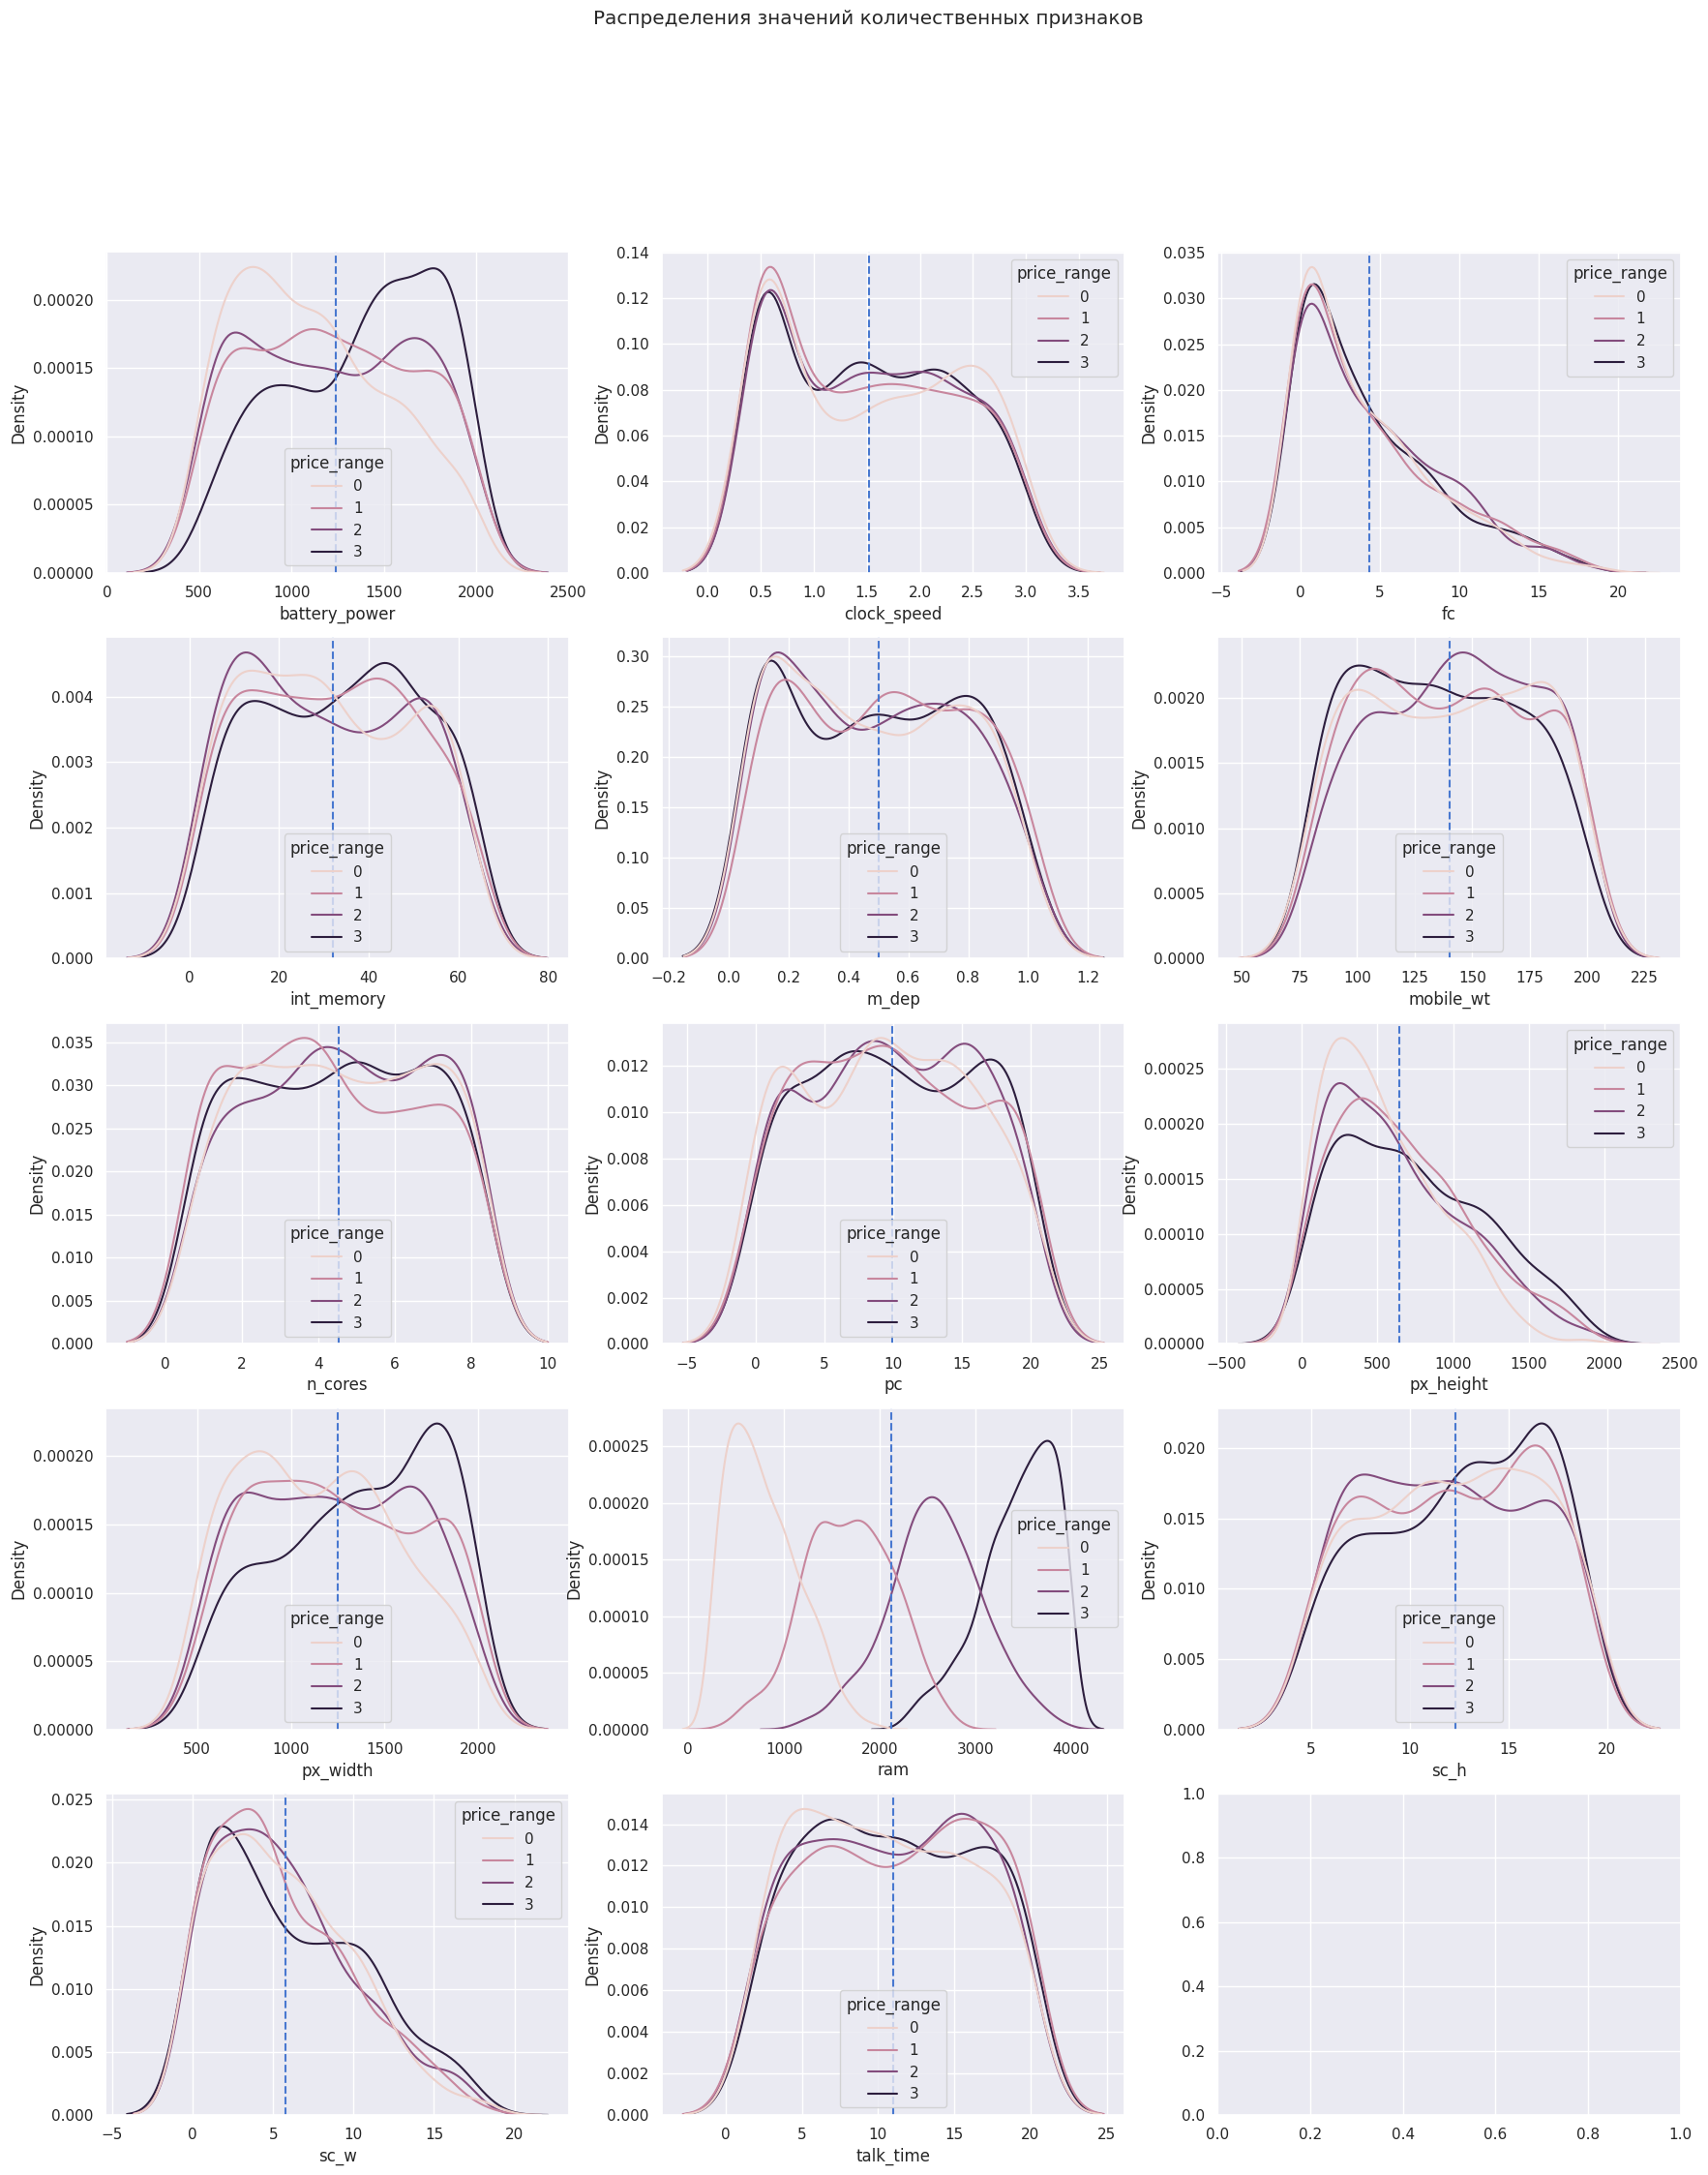

In [9]:
# рисуем распределения плотности
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(21,25))
fig.suptitle('Распределения значений количественных признаков')
ax = axes.flatten()

for i, q in enumerate(quant):
    sns.kdeplot(df, x=q, hue="price_range", ax=ax[i])
    ax[i].axvline(df[q].mean(), color='b', linestyle='--')

Из визуализаций можно сделать вывод, что ценовая категория сильно зависит от RAM и в меньшей степени от battery_life. Проверим это на heatmap.

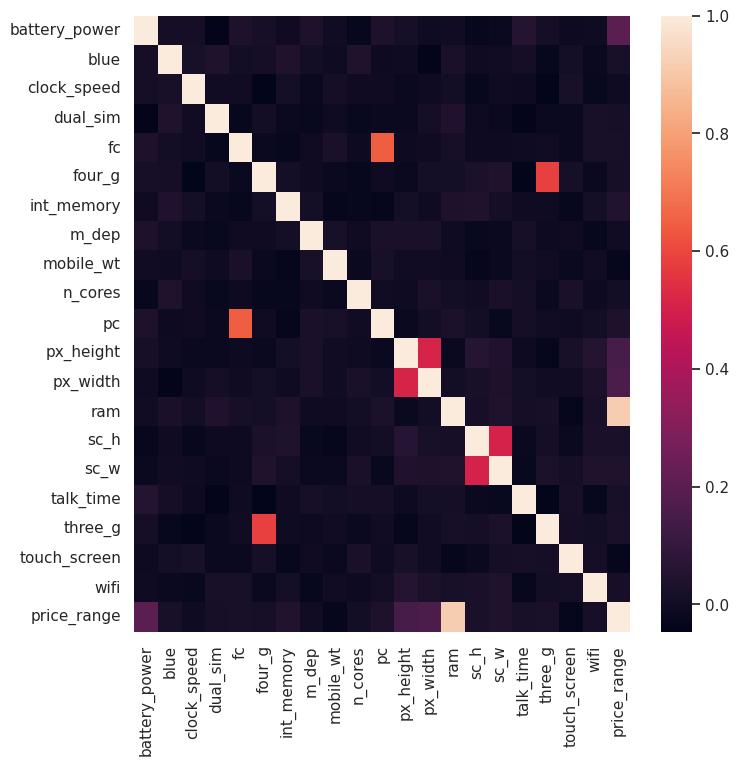

In [10]:
# строим тепловую карту
f, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(data=df.corr(), annot_kws={'rotation': 90})

Тепловая карта также указала на сильную зависимость между `ram` и `price_range` и `battery_life` `price_range`. Также можно добавить к важным призннакам высоту и ширину экрана -- `px_height` и `px_width`.

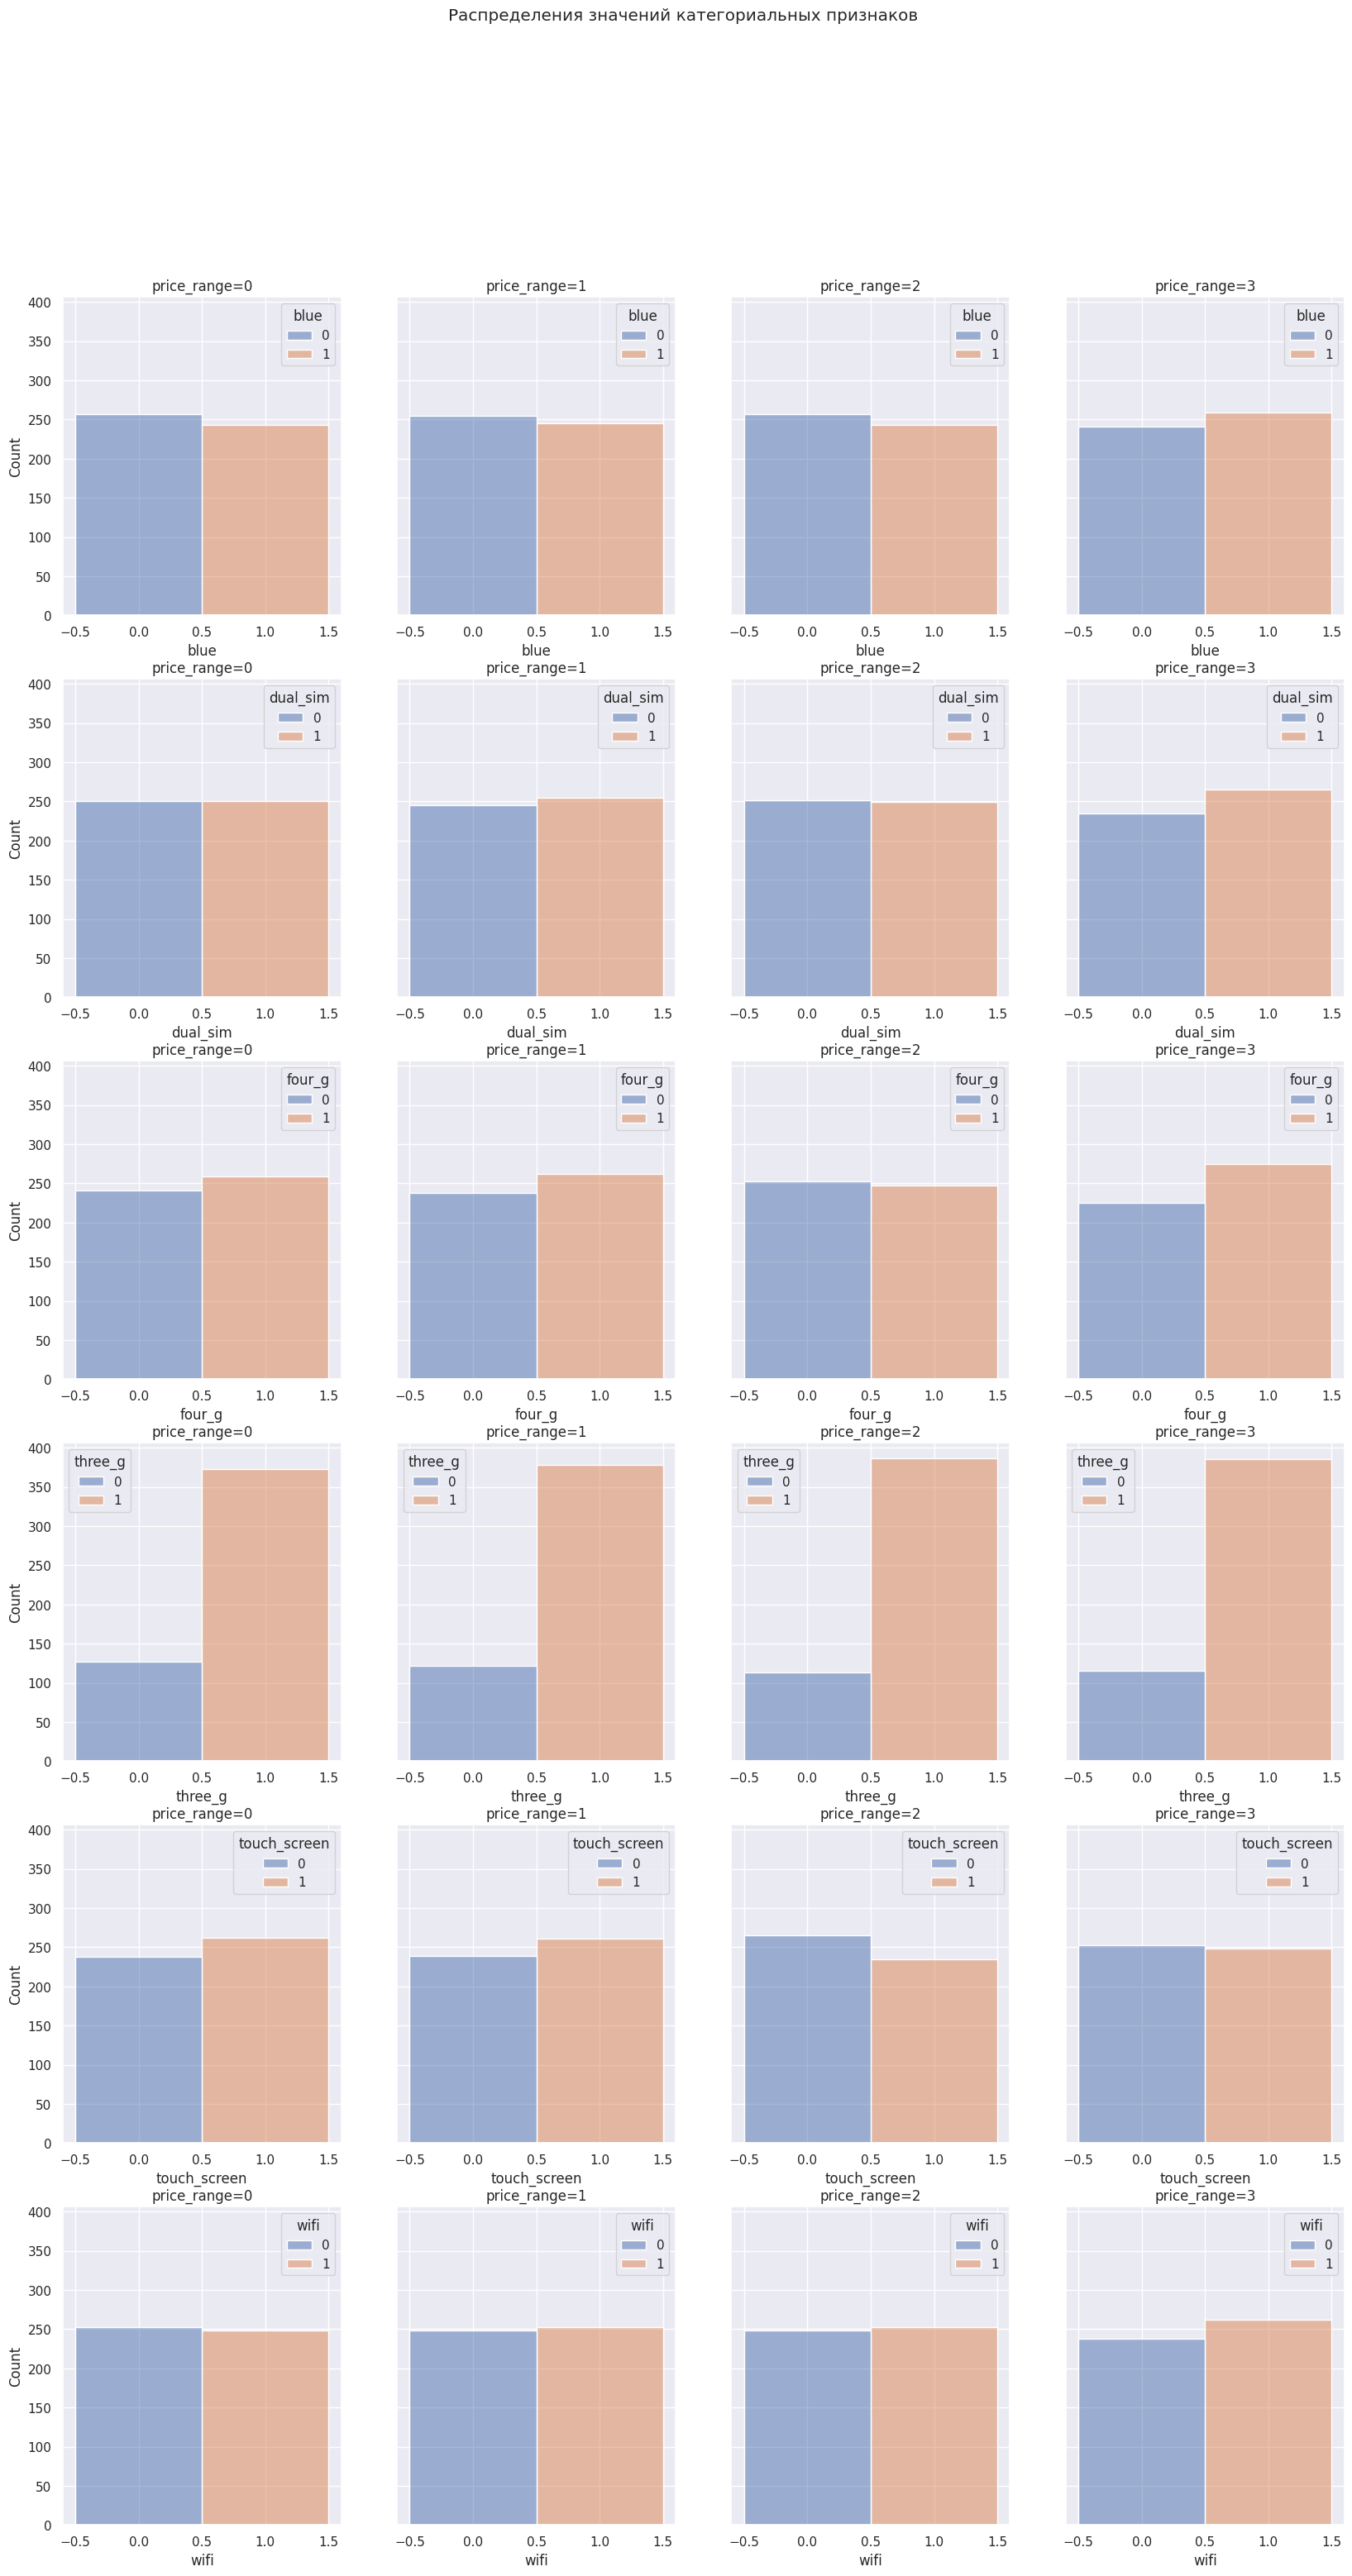

In [11]:
# рисуем распределения плотности
fig, axes = plt.subplots(ncols=4, nrows=6, figsize=(20,35), sharey=True)
fig.suptitle('Распределения значений категориальных признаков')
# ax = axes.flatten()

for i, b in enumerate(binary):
  for j in sorted(df['price_range'].unique()):
    sns.histplot(df[df['price_range']==j], x=b, hue=b, ax=axes[i, j], discrete=True)
    axes[i, j].set_title('price_range=' + str(j))

Из визуализаций видим, что для всех категориальных признаков распределение между 0 и 1 одинаково между разными ценовыми категориями.

## 1.3. Выбрать метрики для оценки качества моделей и аргументировать их

Предлагаю использовать accuracy, поскольку классы сбалансированы

## 1.4. Построить базовую модель - Логистическую регрессию и оценить ее, проанализировать важность признаков

In [12]:
# делим датасет на трейн и тест и нормализуем данные в обучающей выборке
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

X = df.drop(columns=['price_range'])
y = df['price_range']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [13]:
clf = OneVsRestClassifier(LogisticRegression(random_state=42))

In [14]:
# обучаем и делаем предсказания
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [15]:
# считаем accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.87

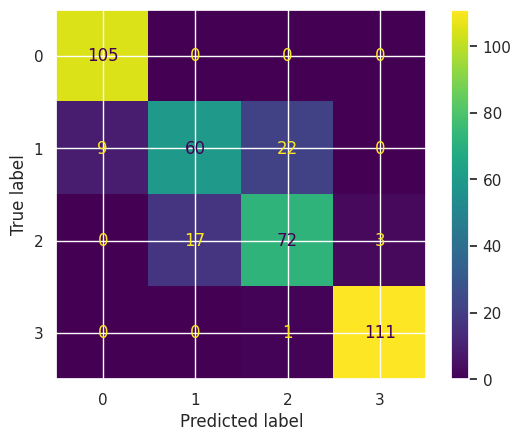

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot()

Модель справляется с классификацией с `accuracy`=0.87. Важно заметить, что модель в некоторых случаях плохо различает price_range=1 и price_range=2

In [17]:
# Заводим датафрейм с весами признаков для price_range=0
weights_baseline0 = pd.DataFrame({'feature': X.columns,
                        'weight': clf.estimators_[0].coef_.flatten()})
weights_baseline0.sort_values('weight', ascending=False)

,feature,weight
8,mobile_wt,0.278500
3,dual_sim,0.146739
2,clock_speed,0.110480
18,touch_screen,0.087231
19,wifi,0.066199
10,pc,0.058984
9,n_cores,0.047857
5,four_g,0.041234
14,sc_h,0.026195
16,talk_time,0.023433


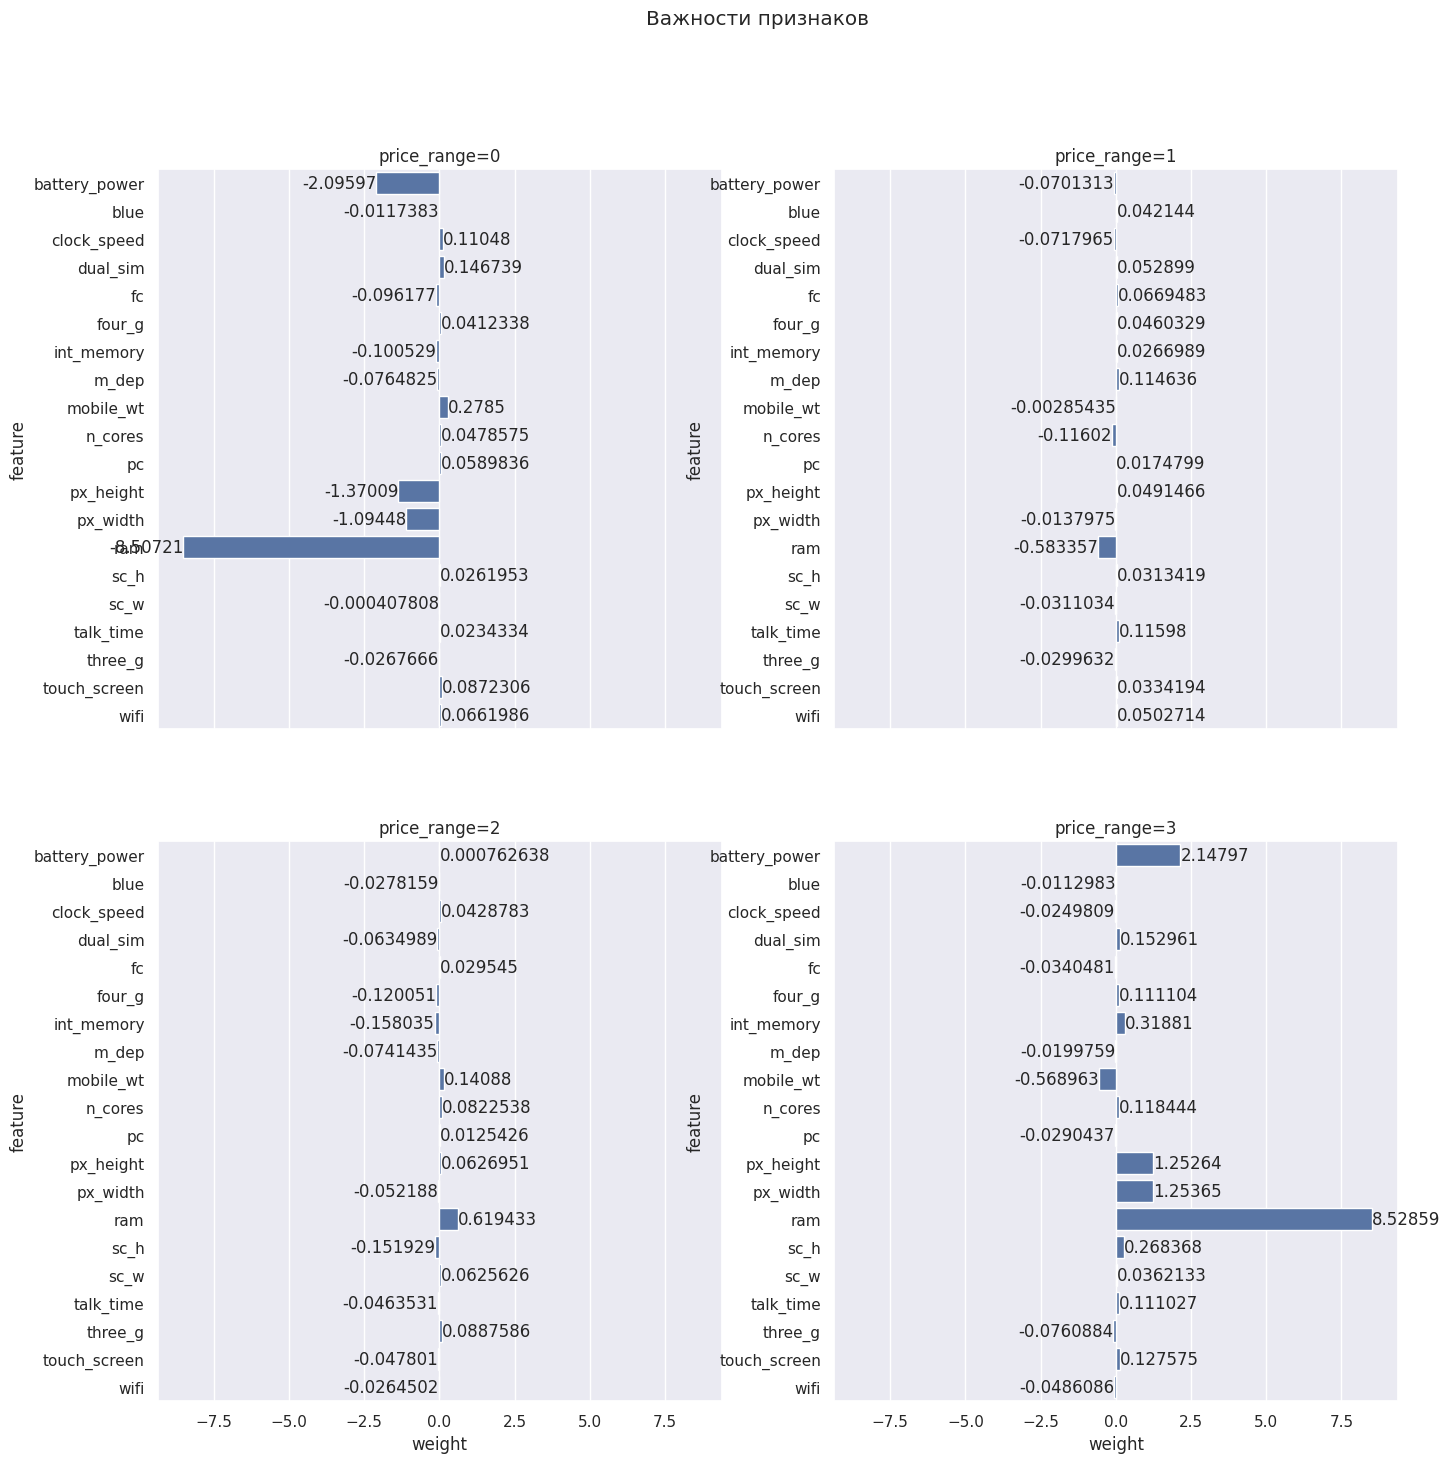

In [18]:
# рисуем важность признаков
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,16), sharex=True)
fig.suptitle('Важности признаков')
ax = axes.flatten()

for i in range(len(clf.estimators_)):
    weights_baseline = pd.DataFrame({'feature': X.columns, 'weight': clf.estimators_[i].coef_.flatten()})
    ax[i].set_title('price_range=' + str(i))
    p = sns.barplot(weights_baseline, x='weight', y='feature', ax=ax[i])
    p.bar_label(p.containers[0])

И снова видим важность признака RAM

## 1.5. Осуществить подбор гипер-параметров для модели логистической регрессии. Оценить изменение метрик и важности признаков

In [19]:
# определяем пул значений для RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

clf_rs = OneVsRestClassifier(LogisticRegression(random_state=42))

distributions = {
    'estimator__C': uniform(loc=0, scale=4),
    'estimator__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

clf_rs = RandomizedSearchCV(estimator=clf, param_distributions=distributions, random_state=42)

In [20]:
# обучаем и находим лучшие гиперпараметры
clf_rs.fit(X_train, y_train)

clf_rs.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

{'estimator__C': np.float64(2.887995089067299), 'estimator__solver': 'saga'}

In [21]:
clf_rs.best_score_

np.float64(0.8387500000000001)

In [22]:
# считаем accuracy
from sklearn.metrics import accuracy_score
y_pred_rs = clf_rs.predict(X_test)
accuracy_score(y_test, y_pred_rs)

0.88

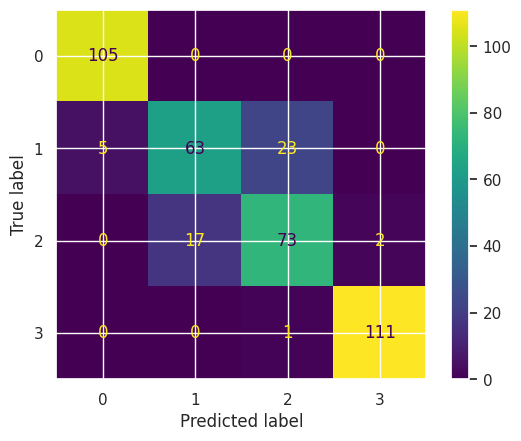

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred_rs)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf_rs.classes_)
disp.plot()

In [24]:
# Заводим датафрейм с весами признаков для price_range=0
weights_baseline_rs0 = pd.DataFrame({'feature': X.columns,
                        'weight': clf_rs.best_estimator_.estimators_[0].coef_.flatten()})
weights_baseline_rs0.sort_values('weight', ascending=False)

,feature,weight
8,mobile_wt,0.402561
3,dual_sim,0.177523
5,four_g,0.142042
19,wifi,0.123442
18,touch_screen,0.118097
2,clock_speed,0.108068
10,pc,0.091844
16,talk_time,0.077644
14,sc_h,0.060354
9,n_cores,0.015536


In [25]:
# Импортируем библиотеки для визуализации и настраиваем тему
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid") # white, dark, whitegrid, darkgrid, ticks
sns.set_color_codes("muted")

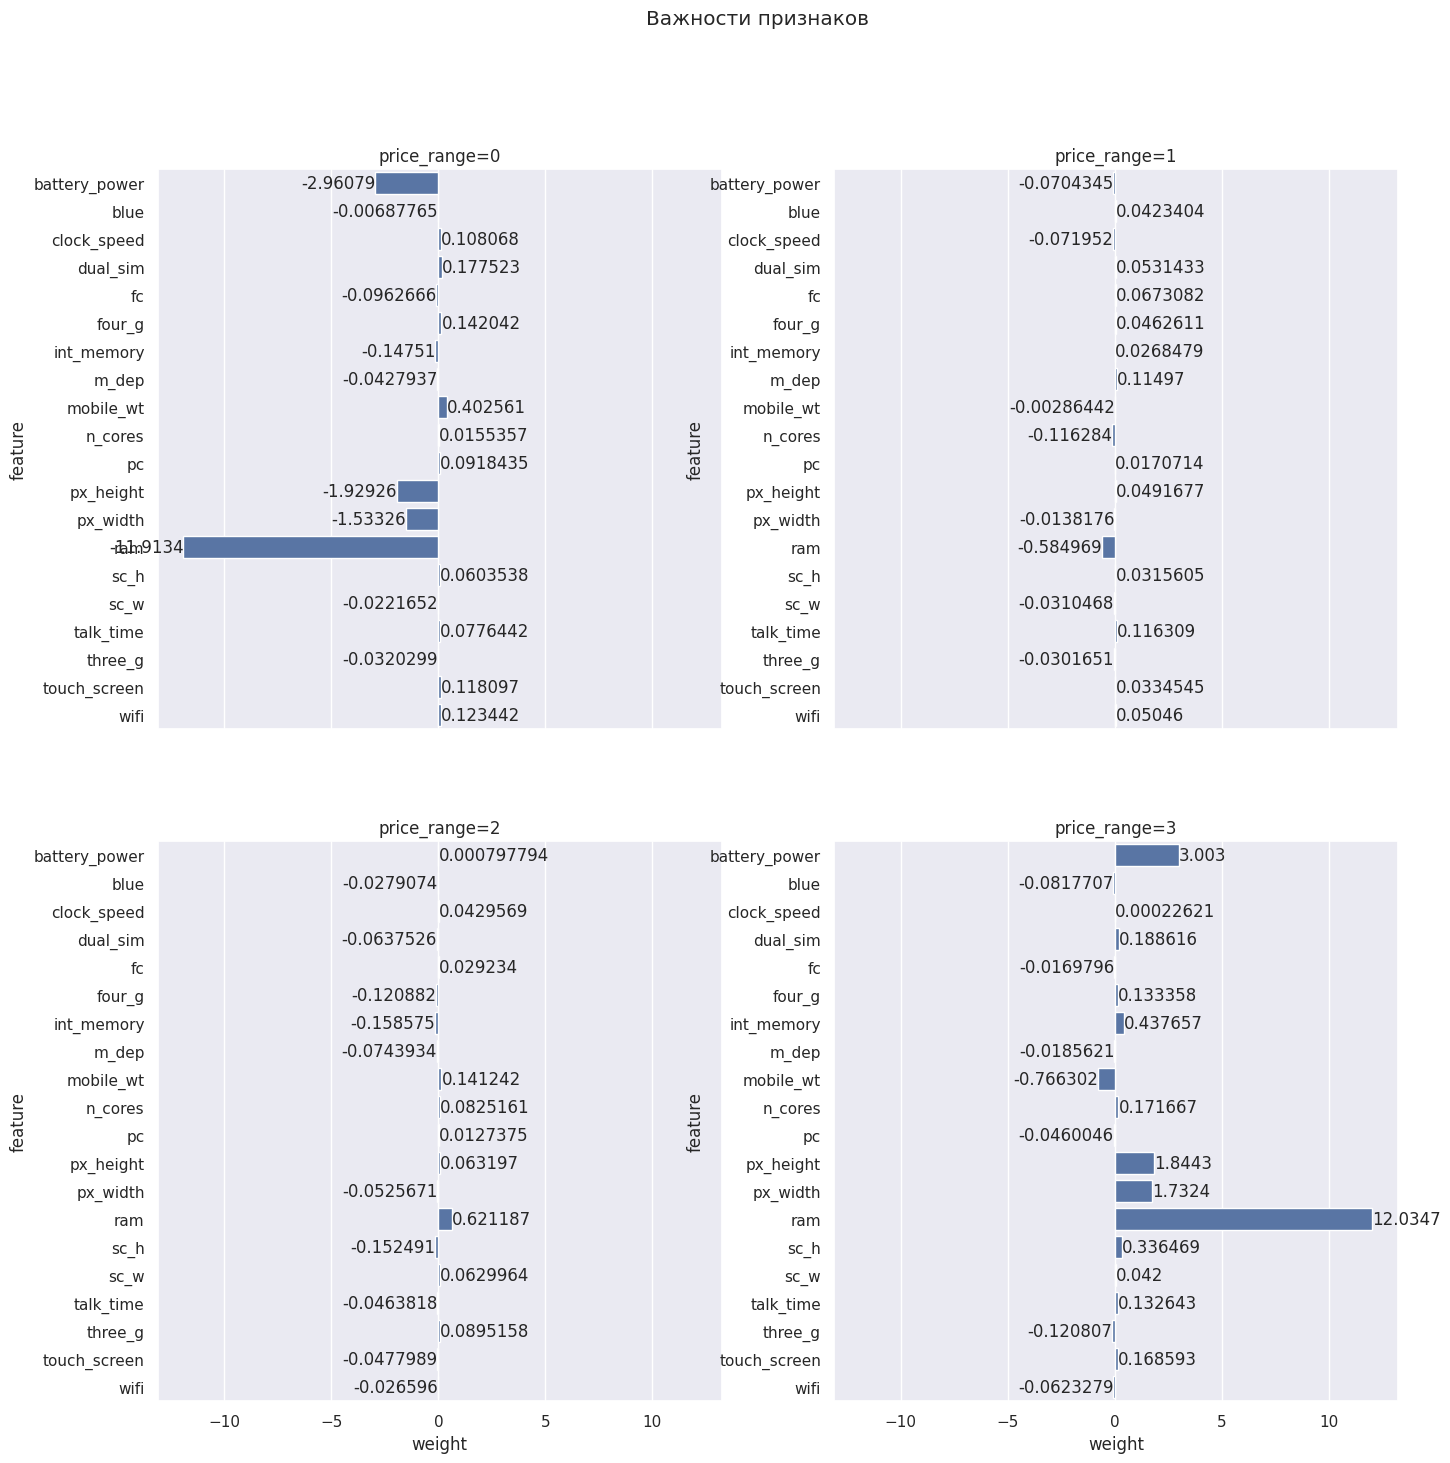

In [26]:
# рисуем важность признаков
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,16), sharex=True)
fig.suptitle('Важности признаков')
ax = axes.flatten()

for i in range(len(clf_rs.best_estimator_.estimators_)):
    weights_baseline_rs = pd.DataFrame({'feature': X.columns, 'weight': clf_rs.best_estimator_.estimators_[i].coef_.flatten()})
    ax[i].set_title('price_range=' + str(i))
    p = sns.barplot(weights_baseline_rs, x='weight', y='feature', ax=ax[i])
    p.bar_label(p.containers[0])

In [27]:
# помещаем веса признаков бэйзлайна для всех price_range в один датафрейм
weights_baseline_comp = pd.concat([pd.DataFrame({'price_range':i, 'feature': X.columns, 'weight': clf.estimators_[i].coef_.flatten()}) for i in range(len(clf.estimators_))])

# помещаем веса признаков модели с лучшими гиперпараметрами для всех price_range в один датафрейм
weights_rs_comp = pd.concat([pd.DataFrame({'price_range':i, 'feature': X.columns, 'weight': clf_rs.best_estimator_.estimators_[i].coef_.flatten()}) for i in range(len(clf_rs.best_estimator_.estimators_))])

# джойним оба датафрейма, чтобы сравнить веса до и после настройки гиперпараметров
weights_comp = pd.merge(left=weights_baseline_comp, right=weights_rs_comp, on=['price_range', 'feature'], how='outer', suffixes=('_baseline', '_rs'))

# добавляем колонку с разницей
weights_comp['diff'] = weights_comp['weight_baseline'] - weights_comp['weight_rs']

In [28]:
weights_comp.style.background_gradient(subset='diff', cmap='YlOrRd')

,price_range,feature,weight_baseline,weight_rs,diff
0,0,battery_power,-2.095972,-2.960787,0.864815
1,0,blue,-0.011738,-0.006878,-0.004861
2,0,clock_speed,0.110480,0.108068,0.002412
3,0,dual_sim,0.146739,0.177523,-0.030784
4,0,fc,-0.096177,-0.096267,0.000090
5,0,four_g,0.041234,0.142042,-0.100808
6,0,int_memory,-0.100529,-0.147510,0.046980
7,0,m_dep,-0.076482,-0.042794,-0.033689
8,0,mobile_wt,0.278500,0.402561,-0.124060
9,0,n_cores,0.047857,0.015536,0.032322


После настройки гиперпараметров веса почти не поменялись, и основные изменения произошли для признаков ram, battery_power, px_height и px_width: для price_range=0 признаки уменьшили вес, а для price_range=3, наоборот, увеличили. При этом accuracy возросло на 1 процентный пункт.

## 1.6. Постройте модель из библиотеки lightgbm - LGBMClassifier, и также оцените ее

In [29]:
from lightgbm import LGBMClassifier

In [30]:
clf_lgbm = OneVsRestClassifier(LGBMClassifier(random_state=42, verbose_eval=False))

In [31]:
# обучаем и делаем предсказания
clf_lgbm.fit(X_train, y_train)
y_pred_lgbm = clf_lgbm.predict(X_test)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Info] Number of positive: 395, number of negative: 1205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246875 -> initscore=-1.115349
[LightGBM] [Info] Start training from score -1.115349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [32]:
# считаем accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lgbm)

0.905

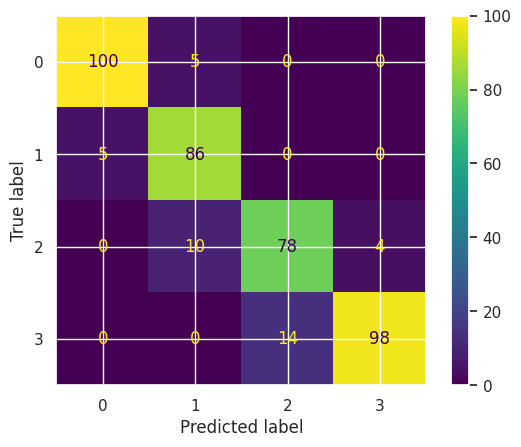

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf_lgbm.classes_)
disp.plot()

LGBMClassifier из коробки сработал лучше, чем логистическая регрессия с accuracy=0.905

## 1.7. Опишите какие гипер-параметры есть у бустинга над решающими деревьями, и подберите лучшие для классификатора из пункта 6.

- num_leaves - максимальное количество листьев
- max_depth - максимальная глубина дерева
- learning_rate
- n_estimators - количество деревьев, участвующих в обучении
- min_split_gain - минимальный размер уменьшения лосса перед следующим разделеним ноды
- reg_alpha - L1 регуляризация
- reg_lambda - L2 регуляризация

In [34]:
# определяем пул значений для GridSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

grid = {
    # 'estimator__num_leaves': list(range(0,5,5)),
    'estimator__max_depth': [1, 5, 10, 50, -1],
    'estimator__n_estimators': [10, 20, 30, 50, 80, 100]
}

clf_lgbm_gs = GridSearchCV(estimator=clf_lgbm, param_grid=grid)

In [35]:
# обучаем и находим лучшие гиперпараметры
clf_lgbm_gs.fit(X_train, y_train)

clf_lgbm_gs.best_params_

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

{'estimator__max_depth': 50, 'estimator__n_estimators': 100}

In [43]:
# считаем accuracy
from sklearn.metrics import accuracy_score
y_pred_lgbm_gs = clf_lgbm_gs.predict(X_test)
accuracy_score(y_test, y_pred_lgbm_gs)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval


0.905

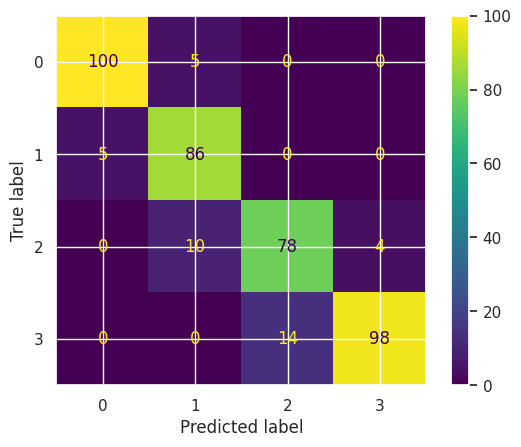

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred_lgbm_gs)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf_lgbm_gs.classes_)
disp.plot()

## 1.8. Проанализируйте важность признаков модели бустинга. Какие признаки похожи по важности с линейной моделью? Какие отличаются? Почему так может быть?

In [38]:
# Импортируем библиотеки для визуализации и настраиваем тему
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid") # white, dark, whitegrid, darkgrid, ticks
sns.set_color_codes("muted")

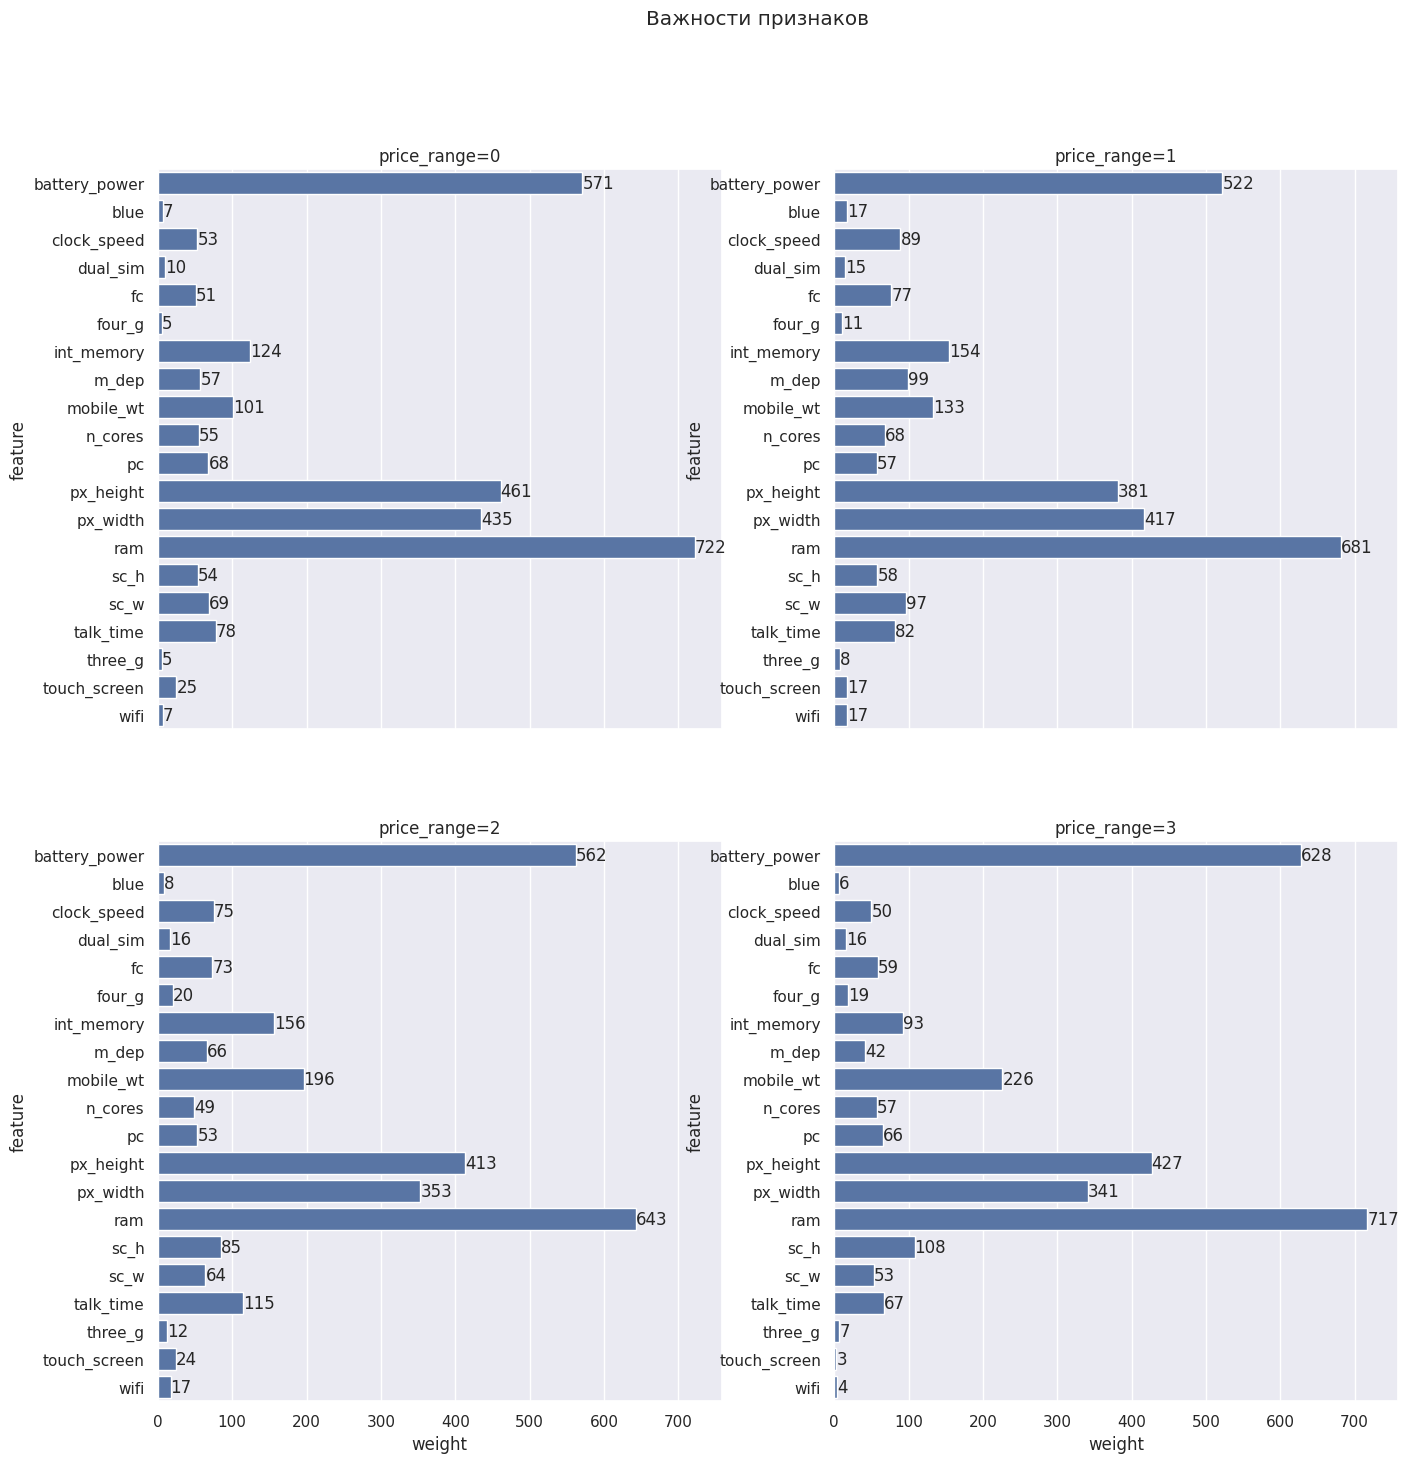

In [39]:
# рисуем важность признаков
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,16), sharex=True)
fig.suptitle('Важности признаков')
ax = axes.flatten()

for i in range(len(clf_lgbm_gs.best_estimator_.estimators_)):
    weights_lgbm_rs = pd.DataFrame({'feature': X.columns, 'weight': clf_lgbm_gs.best_estimator_.estimators_[i].feature_importances_.flatten()})
    ax[i].set_title('price_range=' + str(i))
    p = sns.barplot(weights_lgbm_rs, x='weight', y='feature', ax=ax[i])
    p.bar_label(p.containers[0])

Среди наиболее важных все так же остаются признаки battery_power, px_height, px_width и ram

## 1.8. Приведите примеры хороших предсказаний при помощи бустинга, приведите примеры плохих.

In [40]:
lgbm_comp = pd.concat([y_test, pd.Series(y_pred_lgbm_gs, index=y_test.index)], axis=1)
lgbm_comp.columns = ['true', 'pred']

In [41]:
# "хорошие" предсказания
df.loc[lgbm_comp[lgbm_comp['true']==lgbm_comp['pred']].head(10).index]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1860,1646,0,2.5,0,3,1,25,0.6,200,2,...,211,1608,686,8,6,11,1,1,0,0
353,1182,0,0.5,0,7,1,8,0.5,138,8,...,275,986,2563,19,17,19,1,0,0,2
1333,1972,0,2.9,0,9,0,14,0.4,196,7,...,293,952,1316,8,1,8,1,1,0,1
905,989,1,2.0,0,4,0,17,0.2,166,3,...,256,1394,3892,18,7,19,1,1,0,3
1289,615,1,0.5,1,7,0,58,0.5,130,5,...,1021,1958,1906,14,5,5,1,0,0,1
1273,627,1,1.6,1,3,1,12,0.2,131,7,...,447,819,2476,17,1,10,1,0,0,1
938,894,0,0.9,0,5,1,54,0.2,130,3,...,104,541,2829,11,5,13,1,0,1,2
1731,1066,0,3.0,1,6,1,5,0.5,167,5,...,53,1504,1044,8,7,11,1,0,0,0
65,616,0,1.9,1,13,1,44,0.8,81,3,...,651,1618,3366,18,8,13,1,1,0,3
1323,712,0,0.5,0,6,0,27,0.5,86,2,...,1245,1309,2001,11,10,12,1,1,1,1


In [42]:
# "плохие" предсказания
pd.concat([df.loc[lgbm_comp[lgbm_comp['true']!=lgbm_comp['pred']].head(10).index], lgbm_comp[lgbm_comp['true']!=lgbm_comp['pred']]['pred'].head(10)], axis=1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pred
1292,1365,0,0.6,0,0,1,31,0.3,125,4,...,970,1300,14,7,13,1,0,1,0,1
374,1334,1,2.4,0,5,1,42,0.6,115,5,...,1974,2542,10,1,8,1,0,0,3,2
1664,1288,0,0.5,1,3,1,61,0.2,115,6,...,1503,1882,16,6,10,1,0,1,2,1
1927,1023,1,0.7,0,2,1,63,0.7,153,7,...,1985,3155,11,10,7,1,1,1,3,2
1568,729,1,2.0,0,0,0,14,0.6,135,6,...,1055,3397,19,15,17,1,0,1,2,3
824,1722,1,1.0,0,7,0,25,0.8,88,6,...,1638,2376,5,1,19,0,0,1,3,2
507,512,1,0.5,1,7,0,15,0.9,83,3,...,1849,2610,18,14,15,0,1,1,2,1
1741,946,1,1.4,0,9,0,26,0.1,186,6,...,891,1637,7,3,6,1,0,1,0,1
1696,1890,0,1.1,0,4,1,48,0.5,127,4,...,1832,2392,10,4,15,1,0,1,3,2
1473,541,0,1.0,0,0,1,10,0.4,127,4,...,1873,1019,19,9,15,1,1,0,1,0


## 1.10. Как изменились метрики? Проанализируйте итоговые значения для всех моделей.

Настройка гиперпараметров не дала значительных изменений в моем случае, что скорее всего говорит о том, что на настройку гипермараметров следовало бы уделить больше времени и сделать больше экспериментов. Также мы увидели, что градиентный бустинг действительно хорошо работает даже без настройки гиперпараметров -- просто из коробки.